Accuracy: 0.8


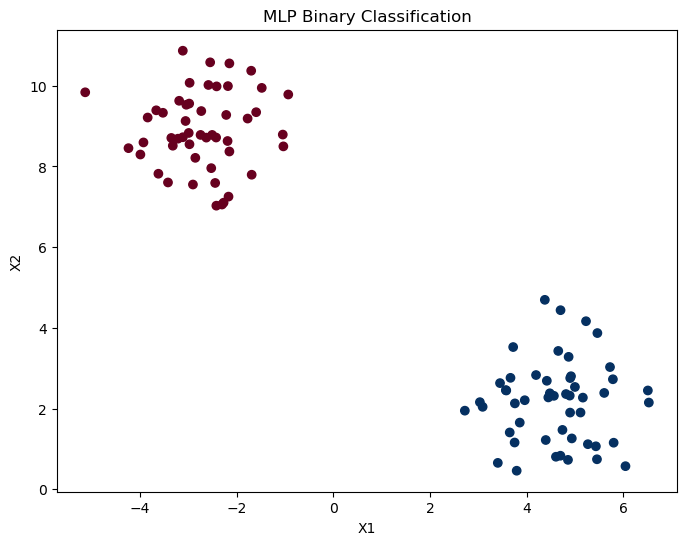

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_samples=100, centers=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

np.random.seed(42)

num_features = X.shape[1]
hidden_layers = [10, 5, 3] 
num_output = 1
layers = [num_features] + hidden_layers + [num_output]
num_layers = len(layers)

weights = []
biases = []
for i in range(num_layers - 1):
    W = np.random.randn(layers[i], layers[i+1])
    b = np.zeros((1, layers[i+1]))
    weights.append(W)
    biases.append(b)

activations = [X_test]
for i in range(num_layers - 2):
    Z = np.dot(activations[i], weights[i]) + biases[i]
    A = sigmoid(Z)
    activations.append(A)
Z_output = np.dot(activations[-1], weights[-1]) + biases[-1]
A_output = sigmoid(Z_output)

y_pred = np.where(A_output >= 0.5, 1, 0)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Binary Classification Using MLP")
plt.show()



